<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/notebooks/models/descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libaries
import os
import json
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata

from matplotlib import pyplot

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')

In [ ]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [ ]:
# Feature Data

fa_cup_raw_features = """
    select * from preparation_layer.view_fa_cup_round_3_features
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe()
display(fa_cup_raw_features_df)


In [ ]:
# These columns only included to work out home advantage during the Logistic Regression and Neural Netowrks
columns_to_exclude = ['home_win','home_team_league_level','away_team_league_level']

# Create a new DataFrame excluding the specified columns
fa_cup_filtered_df = fa_cup_raw_features_df.drop(columns=columns_to_exclude)
fa_cup_filtered_df['target_variable'] = fa_cup_filtered_df['target_variable'].astype('category')
pivoted_describe = fa_cup_filtered_df.describe(include="all").transpose()
display(pivoted_describe)

pivoted_describe.to_excel("fa_cup_features_describe.xlsx")


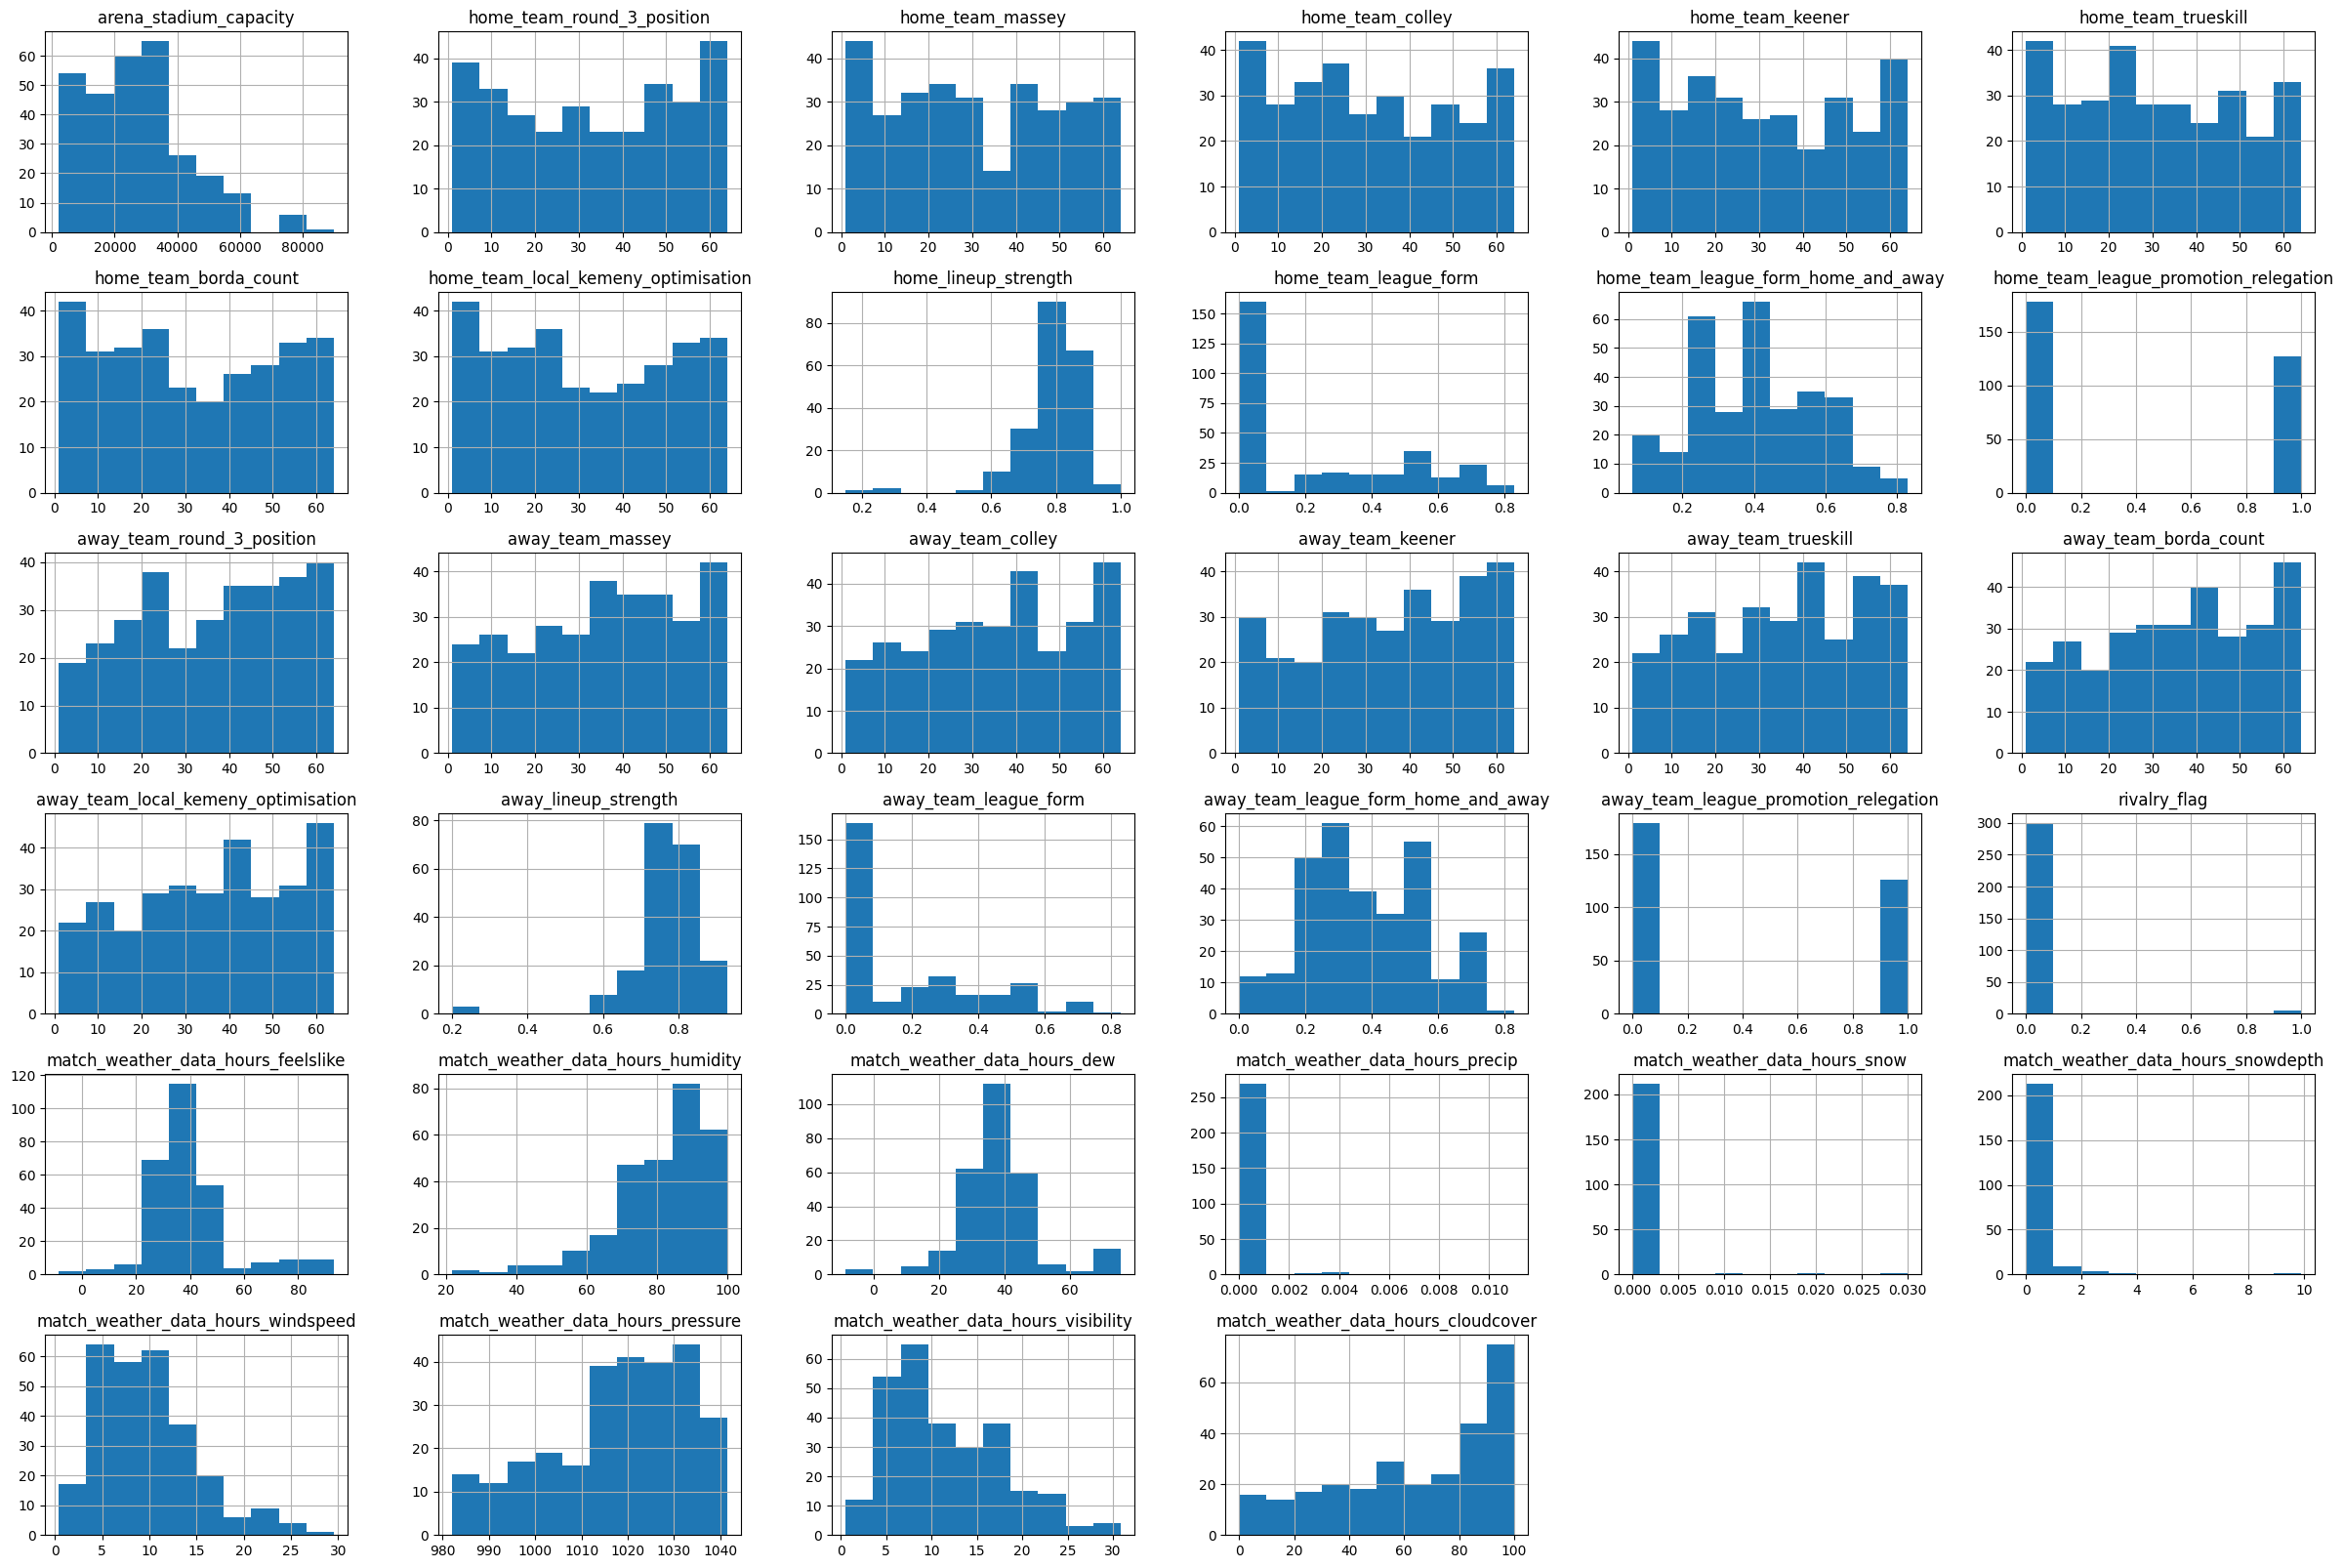

In [ ]:
# Histograms

fa_cup_filtered_df.hist(bins=10, figsize=(30,20))

# Save the figure as a PNG file
pyplot.savefig('fa_cup_histograms.png', dpi=300, bbox_inches='tight')
pyplot.show()
pyplot.close()



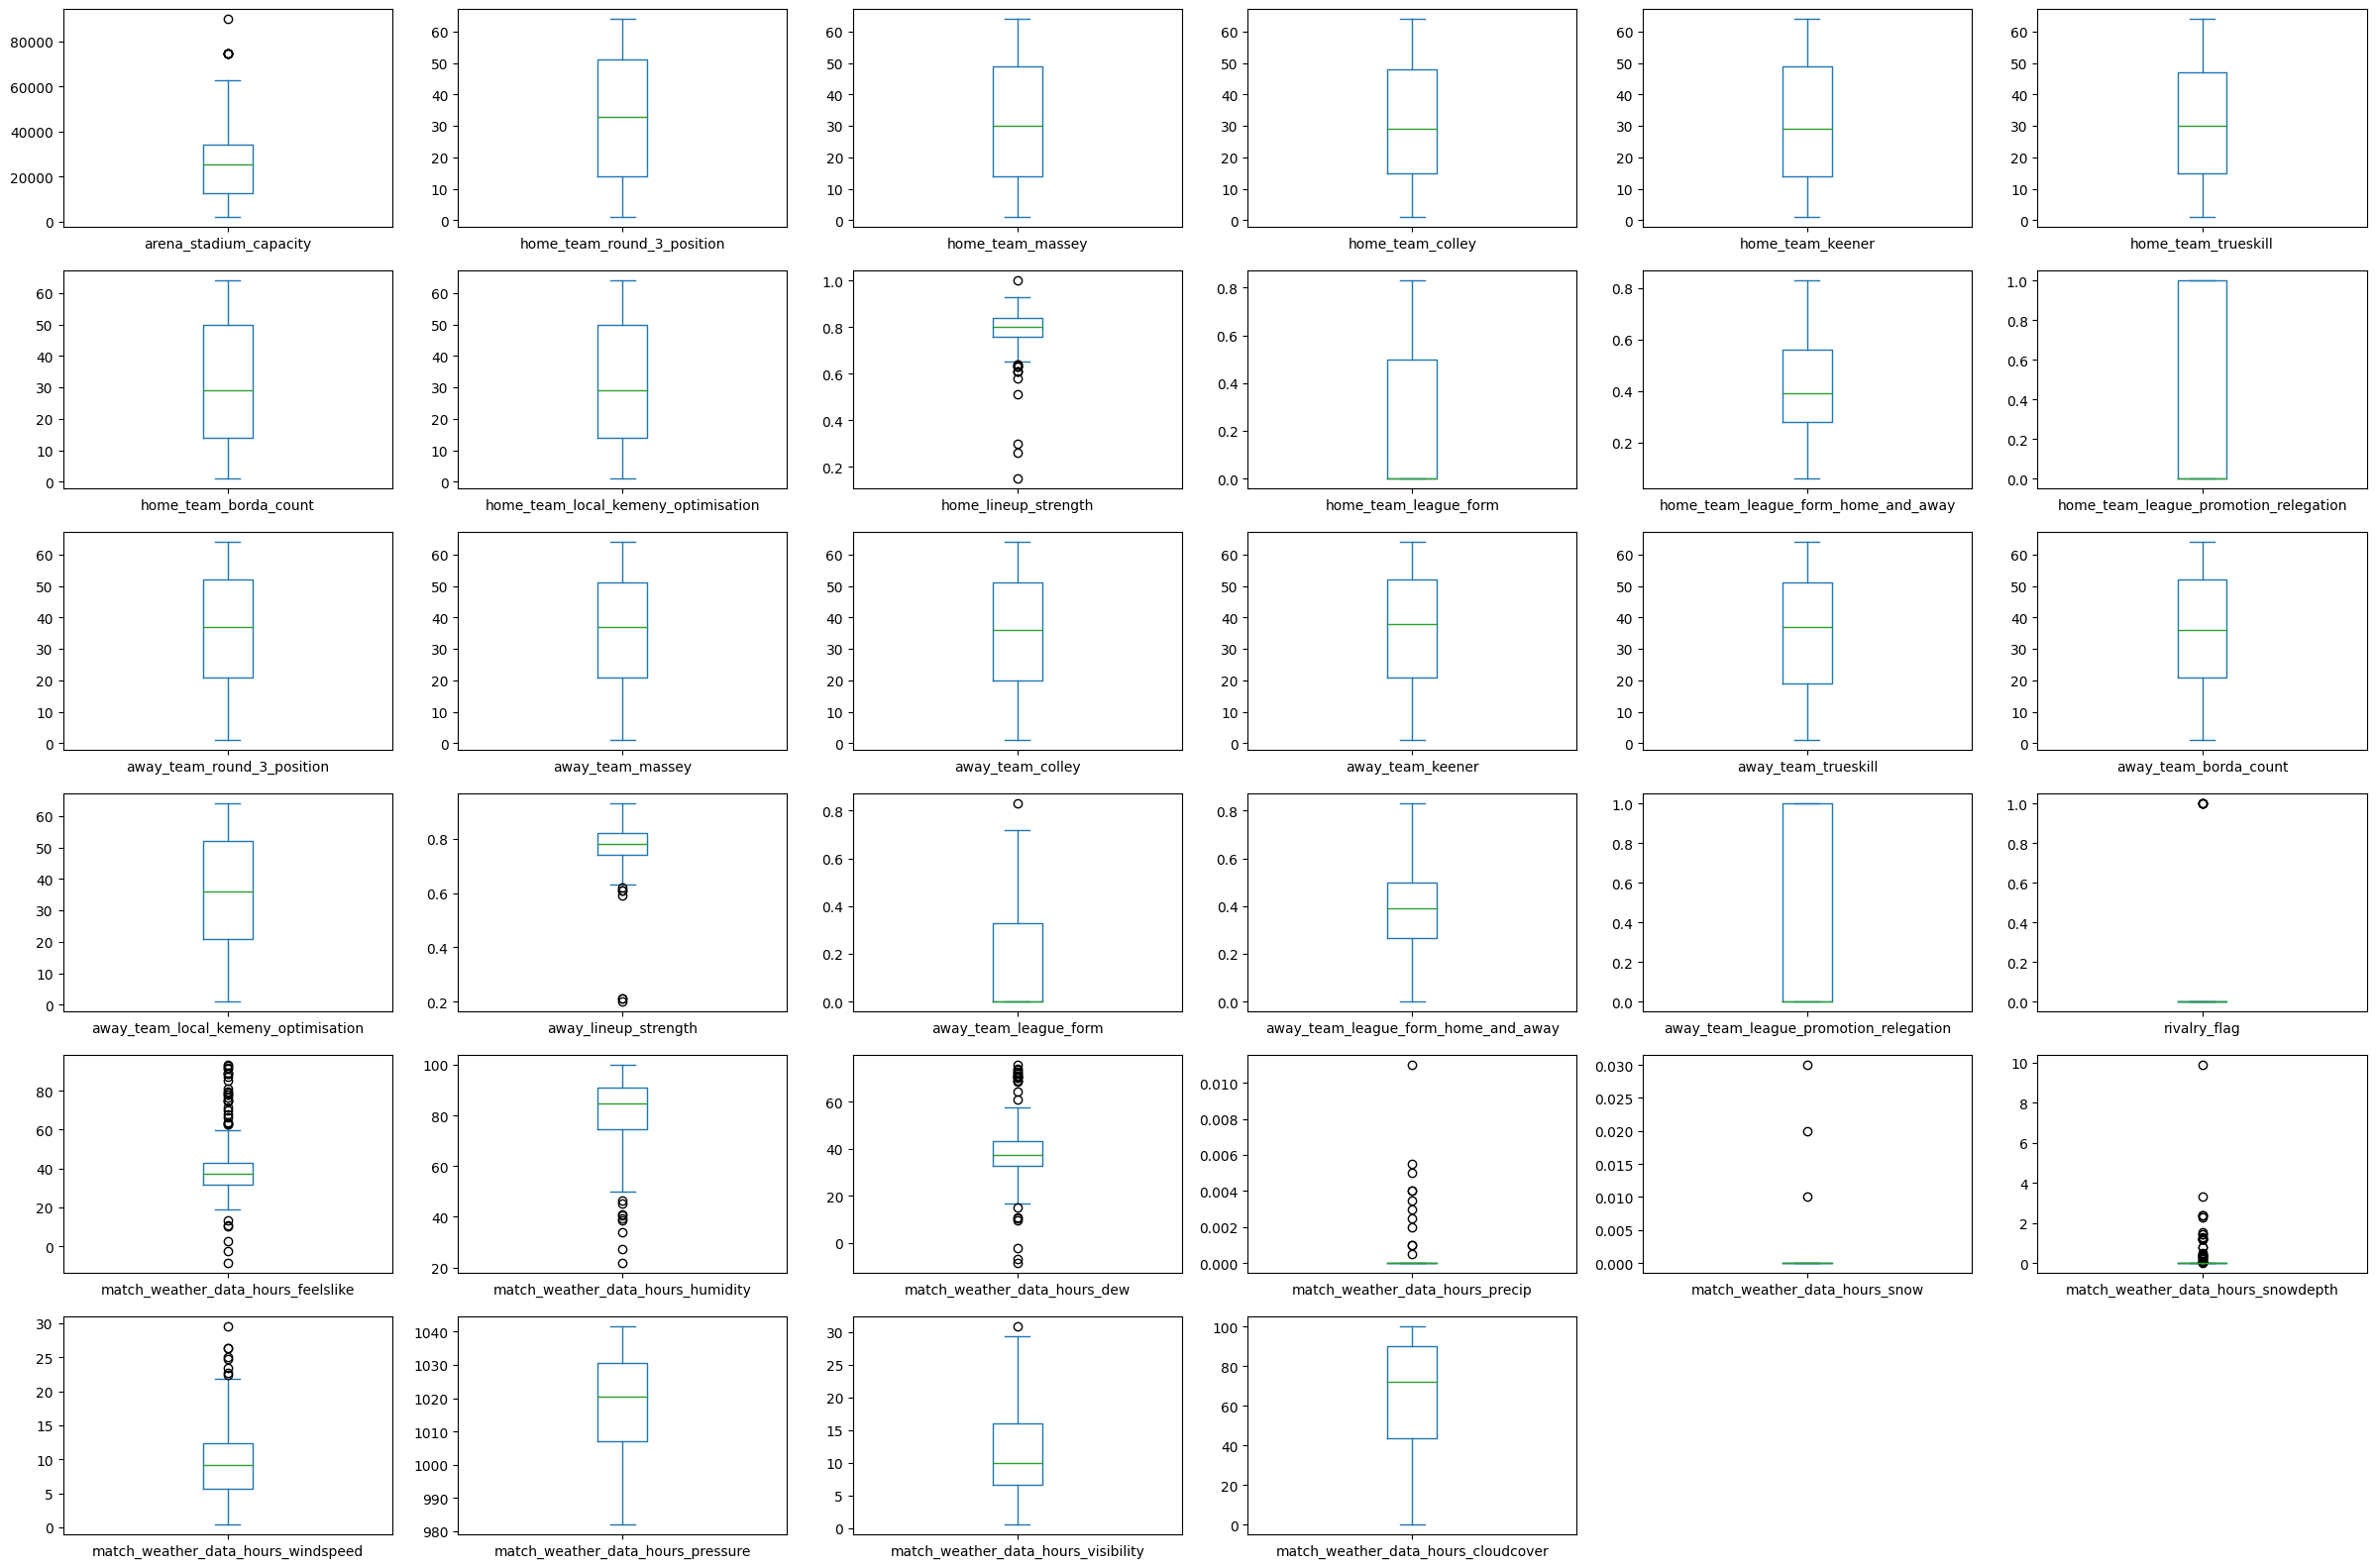

In [ ]:

fa_cup_filtered_df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(30,20))

pyplot.savefig('fa_cup_boxplots.png', dpi=300, bbox_inches='tight')
pyplot.show()
pyplot.close()
